In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

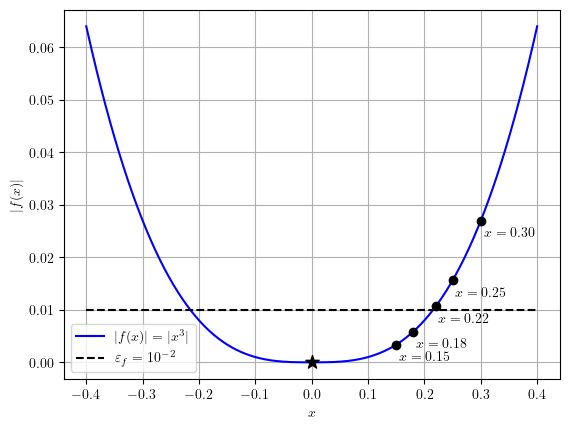

In [12]:
def f_residual(x): 
    return x**3

# choose a few sample iterates that satisfy |f(x)|<tol but are far from 0
eps_f = 1e-2
x_samples = np.array([0.3, 0.25, 0.22, 0.18, 0.15])
res_values = np.abs(f_residual(x_samples))

# Plot
X = np.linspace(-0.4, 0.4, 400)
plt.figure()
plt.plot(X, np.abs(f_residual(X)), label=r'$|f(x)|=|x^3|$', color='blue')
plt.hlines(eps_f, -0.4, 0.4, linestyles='--',
           label=r'$\varepsilon_f=10^{-2}$', color='black')
plt.scatter(x_samples, res_values, zorder=5, color='black')
for x, r in zip(x_samples, res_values):
    plt.annotate(f'$x= {x:.2f}$', xy=(x, r), xytext=(x+0.05, r-0.003),
                 ha='center')
    
# add a star at the true root
plt.scatter(0, 0, zorder=5, color='black', marker='*', s=100)

# plt.title('Failure of the Residual‐Only Criterion')
plt.xlabel(r'$x$')
plt.ylabel(r'$|f(x)|$')
plt.legend()
plt.grid(True)
# plt.tight_layout()
# plt.savefig('false_convergence_residual.pdf', bbox_inches='tight', transparent=True)
plt.show()

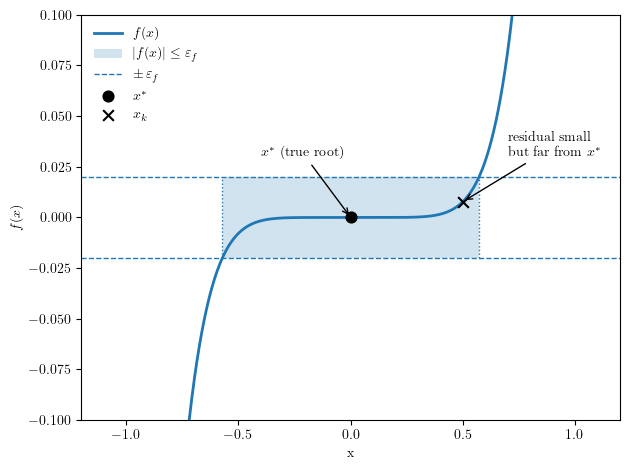

In [ ]:
x_star = 0.0
def f(x): 
    return (x - x_star)**7

x = np.linspace(-1.2, 1.2, 1200)
y = f(x)
eps_f = 2e-2
delta = eps_f ** (1/7)

x_k = 0.5
y_k = f(x_k)

plt.plot(x, y, linewidth=2, label=r"$f(x)$")

mask = np.abs(y) <= eps_f
plt.fill_between(x, -eps_f, eps_f, where=mask, alpha=0.2, label=r"$|f(x)| \leq \varepsilon_f$")
plt.hlines([eps_f, -eps_f], x.min(), x.max(), linestyles="--", linewidth=1, label=r"$\pm\,\varepsilon_f$")

plt.scatter([x_star], [0], s=60, zorder=3, label=r"$x^*$", color="black")
plt.scatter([x_k], [y_k], s=60, marker="x", zorder=3, label=r"$x_k$", color="black")

plt.vlines([x_star - delta, x_star + delta], -eps_f, eps_f, linestyles=":", linewidth=1)

plt.annotate(r"$x^*$ (true root)", xy=(x_star, 0), xytext=(-0.4, 0.03),
             arrowprops=dict(arrowstyle="->", linewidth=1))
plt.annotate("residual small\nbut far from $x^*$", xy=(x_k, y_k), xytext=(0.7, 0.03),
             arrowprops=dict(arrowstyle="->", linewidth=1))

# plt.title("Failure of the Residual Test: Flat $f$ near the root")
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.xlim(-1.2, 1.2)
plt.ylim(-0.1, 0.1)
plt.legend(loc="upper left", frameon=False)
plt.tight_layout()

pdf_path = "../../../figs/nle/residual_test_failure.pdf"
plt.savefig(pdf_path, bbox_inches="tight")
plt.show()

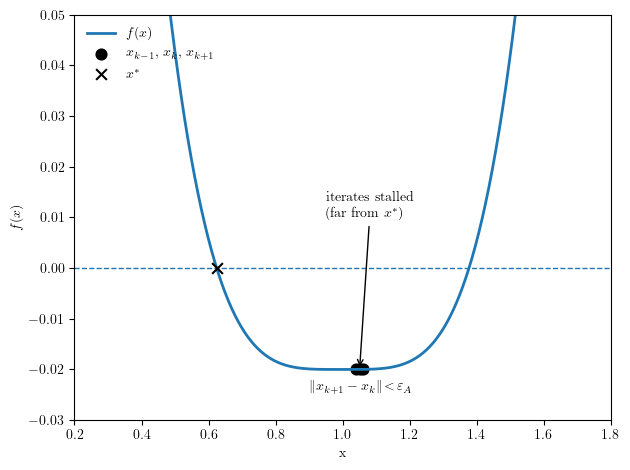

In [ ]:
def f(x):
    return (x - 1.0)**4 - 0.02

eps = 0.02
x_star = 1.0 - eps**0.25
x_km1, x_k, x_kp1 = 1.04, 1.05, 1.06

xs = np.linspace(0.2, 1.8, 800)
ys = f(xs)

plt.figure()
plt.plot(xs, ys, linewidth=2, label=r"$f(x)$")
plt.axhline(0, linestyle="--", linewidth=1)

ykm1, yk, ykp1 = f(x_km1), f(x_k), f(x_kp1)
plt.scatter([x_km1, x_k, x_kp1], [ykm1, yk, ykp1], s=60, label=r"$x_{k-1},\,x_k,\,x_{k+1}$", color="black")

plt.scatter([x_star], [0], s=60, marker="x", zorder=3, label=r"$x^*$", color="black")

eps_A = 0.02
y_band = -0.028
# plt.annotate("", xy=(x_k, y_band), xytext=(x_kp1, y_band), arrowprops=dict(arrowstyle="<->", linewidth=1))
plt.text((x_k + x_kp1)/2, y_band + 0.003, r"$\|x_{k+1}-x_k\|\!<\!\varepsilon_A$", ha="center", va="bottom")

plt.annotate("iterates stalled\n(far from $x^*$)", xy=(x_k, yk), xytext=(.95, 0.01),
             arrowprops=dict(arrowstyle="->", linewidth=1))

# plt.title("Failure of the Step-Size Test: stalled iterates far from the root")
plt.xlabel("x")
plt.ylabel("$f(x)$")
plt.xlim(0.2, 1.8)
plt.ylim(-0.03, 0.05)
plt.legend(loc="upper left", frameon=False)
plt.tight_layout()


pdf_path = "../../../figs/nle/stepsize_test_failure.pdf"
# plt.savefig(pdf_path, bbox_inches="tight")
plt.show()